# Исследование успешности компьютерных игр

Интернет-магазин "Стримчик" продает компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель работы:** выявить определяющие успешность игры закономерности, спланировать кампанию на 2017 год на основании данных за 2016 год. 

**Ход исследования:**
1. Обзор данных
2. Подготовка данных:
   * Переименование столбцов;
   * Обработка пропусков;
   * Замена типов данных;
   * Расчет суммарных продаж
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона:
   * Определение топ-5 самых популярных платформ;
   * Определение топ-5 самых популярных жанров;
   * Изучение влияния рейтинга ESRB на продажи
5. Проверка гипотез:
   * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   * Средние пользовательские рейтинги жанров Action и Sports разные.

## Обзор данных

Откроем предоставленный файл и изучим данные в нем.

In [1]:
#импорт библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#чтение и сохранение данных в переменную data, вывод первых 10 строк на экран
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Предоставленная таблица состоит из 11 столбцов, согласно документации и полученной информации:
* `Name` - название игры, тип данных - `object`;
* `Platform` - платформа, тип данных - `object`;
* `Year_of_Release` - год выпуска, тип данных - `float`;
* `Genre` - жанр игры, тип данных - `object`;
* `NA_sales` - продажи в Северной Америке (миллионы проданных копий), тип данных - `float`;
* `EU_sales` - продажи в Европе (миллионы проданных копий), тип данных - `float`;
* `JP_sales` - продажи в Японии (миллионы проданных копий), тип данных - `float`;
* `Other_sales` - продажи в других странах (миллионы проданных копий), тип данных - `float`;
* `Critic_Score` - оценка критиков (максимум 100), тип данных - `float`;
* `User_Score` - оценка пользователей (максимум 10), тип данных - `object`;
* `Rating` - рейтинг от организации ESRB, тип данных - `object`.

В таблице 16715 записей, в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` количество записей отличается от количества записей в таблице, следовательно, в этих столбцах есть пропуски, которые нужно будет обработать. 

Также нужно будет привести названия столбцов к нижнему регистру. Столбец `Year_of_Release` содержит год релиза, его следует привести к типу `int`. Столбец `User_Score` нужно привести к типу `float`.

### Вывод

На данном этапе был открыт и изучен предоставленный файл.
1. Названия столбцов нужно привести к нижнему регистру.
2. Столбец `Year_of_Release` следует привести к типу `int`, столбец `User_Score` к типу `float`.
3. Также следует нужно обработать пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

## Подготовка данных

### Переименование столбцов

Приведем все названия столбцов к нижнему регистру.

In [4]:
#приведение столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Обработаем пропуски в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

1. `name`

Посмотрим, сколько пропусков в столбце `name`.

In [5]:
#доля пропусков в столбце name
len(data[data['name'].isna()]) / len(data)

0.00011965300628178283

Доля пропусков в столбце `name` очень маленькая, посмотрим, что это за строки.

In [6]:
#строки с пропусками в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Кроме пропуска в столбце с названием игры есть пропуски во многих других столбцах, и если у первой игры неплохие значения продаж, то вторая игра довольно малоизестная. Скорее всего, пропуски возникли из-за ошибки при выгрузке или из-за сбоя в системе. Из-за малого количества информации об этих играх, удалим строки с пропусками в столбце `name`.

In [7]:
#удаление пропусков в столбце name, восстановление индексации
data = data.dropna(subset=['name']).reset_index(drop=True)

2. `year_of_release`

Оценим долю пропусков в столбце `year_of_release`.

In [8]:
#доля пропусков в столбце year_of_release
len(data[data['year_of_release'].isna()]) / len(data)

0.016095255190570215

1.6% пропусков, они могли появиться из-за сбоя в системе или при выгрузке данных. Удалим эти строки.

In [9]:
#удаление пропусков в столбце year_of_release, восстановление индексации
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

3. `genre`

Рассмотрим процент пропусков в столбце `genre`.

In [10]:
#доля пропусков в столбце genre
len(data[data['genre'].isna()]) / len(data)

0.0

В столбце не было найдено пустых значений, скорее всего, они были в записях о играх с пропуском в столбце с названием, а впоследствии удалены.

4. `critic_score`

Посмотрим, сколько пропусков в столбце `critic_score`.

In [11]:
#доля пропусков в столбце critic_score
len(data[data['critic_score'].isna()]) / len(data)

0.5145341765993675

Посмотрим, какие значения есть в столбце.

In [12]:
#уникальные значения столбца user_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце 51% пропусков, они могли возникнуть из-за ошибки в системе или при выгрузке данных. Возможно также, что пропуски присутствуют для игр, вышедших недавно, потому для них еще нет оценки. Пропуски оставим на своих местах.

5. `user_score`

Оценим долю пропусков в столбце `user_score`.

In [13]:
#доля пропусков в столбце user_score
len(data[data['user_score'].isna()]) / len(data)

0.4016662612503041

Доля пропусков - 40%. Посмотрим, какие уникальные значения есть в столбце.

In [14]:
#уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можно заметить значение `tbd` (to be determined или to be decided), оно означает, что решение об оценке еще не принято. Так как для игр с оценкой tbd по сути оценки еще нет, заменим это значение на NaN.

In [15]:
#замена tbd на NaN
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan

Остальные пропуски могут быть связаны с ошибкой при выгрузке данных или с ошибкой в системе, заполнять их не будем, так как логичной замены нет.

6. `rating`

Посмотрим, сколько пропусков в столбце `rating`.

In [16]:
#доля пропусков в столбце rating
len(data[data['user_score'].isna()]) / len(data)

0.5461566528825104

Посмотрим, какие уникальные значения есть в столбце `rating`.

In [17]:
#уникальные значения столбца rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Разберемся, что это за значения. ESRB дает следующие расшифровки:
* `EC`(Early childhood) - «Для детей младшего возраста»: игра подходит для детей от 3 лет;
* `E` (Everyone) - «Для всех»: содержание вполне подходит для возрастной категории от 6 лет; 
* `K-A` (Kids to Adults) - «Для детей и взрослых»: содержание игры вполне подходит для возрастной категории от 6 лет и старше;
* `E10+` (Everyone 10 and older) - «Для всех от 10 лет и старше»;
* `T` (Teen) - «Подросткам»: игра подходит для лиц от 13 лет;
* `M` (Mature) - «Для взрослых»: материалы игры не подходят для подростков младше 17 лет;
* `AO` (Adults Only 18+) - «Только для взрослых»: содержание игры только для взрослых старше 18 лет;
* `RP` (Rating Pending) - Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

В столбце около 55% пропусков. ESRB определяет рейтинг для игр, выпущенных в США или Канаде, следовательно, для других регионов значения пропущены. Заполним пропуски значением 'Unknown'.

In [18]:
#заполнение пропусков значением Unknown
data['rating'] = data['rating'].fillna('Unknown')

### Замена типов данных

Заменим тип данных столбца `year_of_release` на `int`, `user_score` на `float`.

In [19]:
#изменение типа данных year_of_release на int
data['year_of_release'] = data['year_of_release'].astype('int')
#изменение типа данных user_score на float
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Расчет суммарных продаж

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
#расчет суммарных продаж, добавление в новый столбец sales_sum
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Вывод

На данном шаге были:
1. Приведены названия столбцов к нижнему регистру;
2. Обработаны пропуски в таблице;
3. Приведены типы данных в столбце `year_of_release` к `int`, в столбце `user_score` к `float`;
4. Посчитаны суммарные продажи по всем регионам и добавлены в столбец `sales_sum`.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы, для этого построим гистограмму.

[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Количество выпущенных игр')]

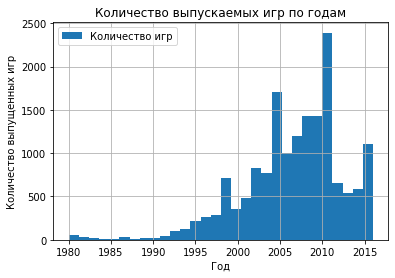

In [22]:
#гистограмма с количеством выпускаемых игр по годам
ax = data.plot(kind='hist', 
               y='year_of_release',
               bins=30, 
               range=(1980, 2016),
               title='Количество выпускаемых игр по годам',
               label='Количество игр',
               grid=True)
ax.set(xlabel='Год', ylabel='Количество выпущенных игр')

По гистограмме можно заметить, что примерно до 1995 года ежегодно выпускалось очень мало игр, примерно с 1998 года начался рост числа выпускаемых игр. В дальнейшем будем рассматривать только игры, выпущенные после 1998 года.

Посмотрим, как с 1998 года менялись продажи по платформам. Для начала выберем платформы с наибольшим числом продаваемых игр. 

In [23]:
#топ платформ по продажам после 1998 года - сводная таблица по платформам с суммой продаж
data_platform = data[data['year_of_release']>=1998].pivot_table(index='platform', 
                                                                values='sales_sum', 
                                                                aggfunc='sum').sort_values(by='sales_sum', 
                                                                                           ascending=False) 
data_platform

,sales_sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,454.72
PS4,314.14
GBA,312.88
PSP,289.53


Будем считать платформами в наибольшим числом суммарных продаж те, у которых значение суммарных продаж больше 200 миллионов копий. Для наглядности построим для каждой популярной платформы график зависимости числа суммарных продаж от года.

<AxesSubplot:title={'center':'Суммарные продажи для популярных платформ по годам'}, xlabel='Год', ylabel='Суммарное количество продаж'>

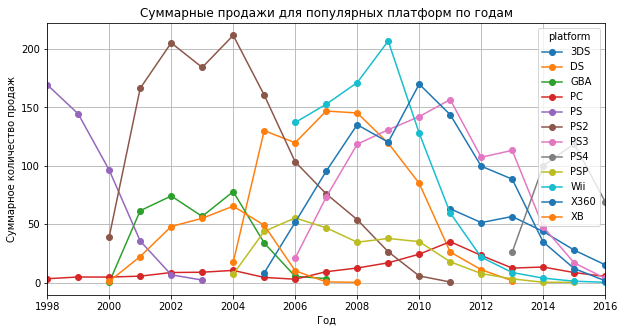

In [24]:
#выделяем платформы с продажами более 200 млн копий
platform_top = data_platform[data_platform['sales_sum']>200].reset_index()['platform']
#сводная таблица для популярных платформ после 1998 года с суммарным количеством продаж в год
platform_top_pivot = data.query('platform in @platform_top and year_of_release>=1998')
platform_top_pivot = platform_top_pivot.pivot_table(index='year_of_release',
                                                    columns='platform',
                                                    values='sales_sum',
                                                    aggfunc='sum')
#график зависимости суммарных продаж от года
platform_top_pivot.plot(style='o-',
                        figsize=(10, 5),
                        xlim=(1998, 2016),
                        title='Суммарные продажи для популярных платформ по годам',
                        xlabel = 'Год',
                        ylabel = 'Суммарное количество продаж',
                        grid=True)

По графику можно заметить, что для популярных платформ от появления до исчезновения проходит в основном от 7 до 12 лет. В настоящее время из всех популярных платформ после 1998 года актуальными на 2016 год являются 8, новейшая появилась в 2013 году. Будем считать актуальным периодом отрезок с 2013 по 2016 год.

Рассмотрим прибыль для платформ в актуальный период. Построим сводную таблицу и график зависимости количества продаж от года.

In [25]:
#сводная таблица для платформ с суммарной прибылью по годам в период 2013-2016 
platform_current = data[data['year_of_release']>=2013].pivot_table(index='year_of_release',
                                                                   columns='platform',
                                                                   values='sales_sum',
                                                                   aggfunc='sum')
platform_current

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:title={'center':'Суммарные продажи для платформ по годам для периода 2013-2016'}, xlabel='Год', ylabel='Суммарное количество продаж'>

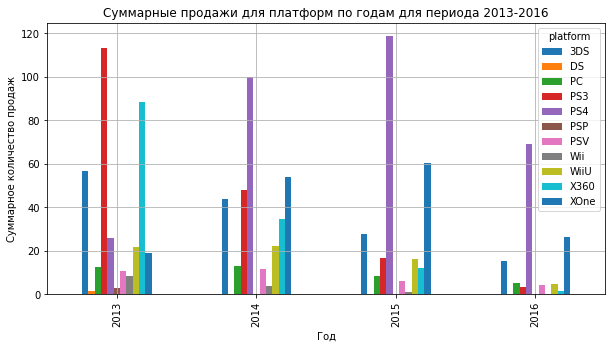

In [26]:
#графики зависимости продаж от года для платформ
platform_current.plot(kind='bar',
                      xlim=(2013, 2016),
                      figsize=(10, 5),
                      title='Суммарные продажи для платформ по годам для периода 2013-2016',
                      xlabel='Год',
                      ylabel='Суммарное количество продаж',
                      grid=True)

По сводной таблице и графику видно, что платформы DS и PSP к 2016 году исчезли с рынка. Также можно заметить, что для всех платформ наблюдается падение продаж к 2016 году, скорее всего, это связано с незаконченным сбором данных за 2016 год. Рост продаж в актуальный период наблюдается только для платформ PS4 и XOne, для остальных платформ наблюдается падение суммарных продаж. Можно выделить 3 потенциально прибыльные платформы, которые лидируют по продажам к 2016 году: PS4, XOne и 3DS.

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.

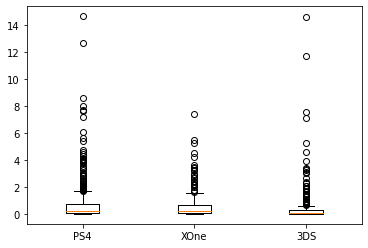

In [27]:
#выделим данные по актуальному периоду 2013-2016
data_current = data[data['year_of_release']>=2013]
#построение диаграмм размаха для платформ в полном размере
plt.boxplot([data_current[data_current['platform']=='PS4']['sales_sum'],
             data_current[data_current['platform']=='XOne']['sales_sum'],
             data_current[data_current['platform']=='3DS']['sales_sum']], 
             labels=['PS4', 'XOne', '3DS'])
plt.show()

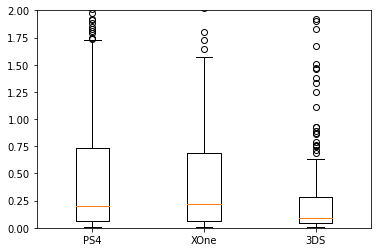

In [28]:
#построение диаграмм размаха для платформ в масштабированном размере
plt.ylim(0, 2)
plt.boxplot([data_current[data_current['platform']=='PS4']['sales_sum'],
             data_current[data_current['platform']=='XOne']['sales_sum'],
             data_current[data_current['platform']=='3DS']['sales_sum']], 
             labels=['PS4', 'XOne', '3DS'])
plt.show()

Для платформы PS4 медианное значение продаж - около 0.23 миллиона проданных копий, максимальное значение - около 14.5 млн, однако диаграмма размаха ограничена значением примерно 1.75 млн проданных копий.

Для платформы XOne медианное значение продаж - около 0.25 миллионов проданных копий, максимальное значение - около 7.5 млн, диаграмма размаха ограничена значением примерно 1.6 млн проданных копий.

Для платформы 3DS медианное значение продаж меньше, чем для двух предыдущих платформ, - около 0.1 миллиона проданных копий, максимальное значение - около 14.6 млн, диаграмма размаха ограничена значением примерно 0.6 млн проданных копий.

Большое количество выбросов  приводит к большому количеству суммарных продаж для платформ.

Посмотрим, как влияют на продажи на популярных платформах отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

* `PS4`

<AxesSubplot:xlabel='Оценка критиков', ylabel='Суммарное количество продаж'>

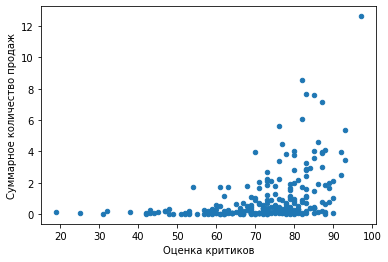

In [30]:
#построение диаграммы рассеяния для оценки критиков
data_current[data_current['platform']=='PS4'].plot(x='critic_score',
                                                   y='sales_sum',
                                                   kind='scatter', 
                                                   xlabel='Оценка критиков',
                                                   ylabel='Суммарное количество продаж')

In [31]:
#вычисление коэффициента Пирсона
data_current[data_current['platform']=='PS4']['critic_score'].corr(data_current[data_current['platform']=='PS4']['sales_sum'])

0.4065679020617816

По полученному графику заметно, что для PS4 с увеличением оценки критиков в некоторых случаях продажи игр растут. Коэффициент Пирсона 0.4 подтверждает, что связь между оценкой критиков и продажами есть, хоть и не сильная.

<AxesSubplot:xlabel='Оценка пользователей', ylabel='Суммарное количество продаж'>

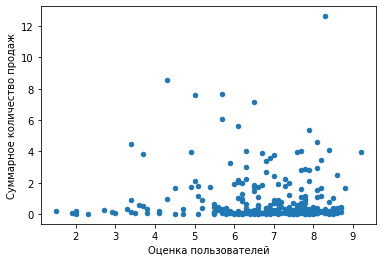

In [32]:
#построение диаграммы рассеяния для оценки пользователей
data_current[data_current['platform']=='PS4'].plot(x='user_score',
                                                   y='sales_sum',
                                                   kind='scatter', 
                                                   xlabel='Оценка пользователей',
                                                   ylabel='Суммарное количество продаж')

In [33]:
#вычисление коэффициента Пирсона
data_current[data_current['platform']=='PS4']['user_score'].corr(data_current[data_current['platform']=='PS4']['sales_sum'])

-0.031957110204556424

По полученной диаграмме можно сказать, что для платформы PS4 оценка пользователей не влияет на продажи игр, коэффициент Пирсона -0.03 также это подтверждает.

* `XOne`

<AxesSubplot:xlabel='Оценка критиков', ylabel='Суммарное количество продаж'>

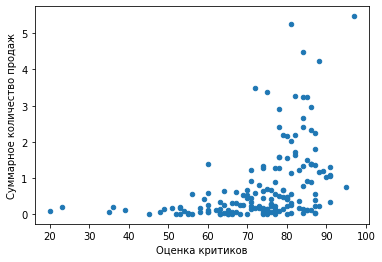

In [34]:
#построение диаграммы рассеяния для оценки критиков
data_current[data_current['platform']=='XOne'].plot(x='critic_score',
                                                    y='sales_sum',
                                                    kind='scatter', 
                                                    xlabel='Оценка критиков',
                                                    ylabel='Суммарное количество продаж')

In [35]:
#вычисление коэффициента Пирсона
data_current[data_current['platform']=='XOne']['critic_score'].corr(data_current[data_current['platform']=='XOne']['sales_sum'])

0.4169983280084017

По полученному графику заметно, что для XOne с увеличением оценки критиков в некоторых случаях продажи игр растут. Коэффициент Пирсона 0.42 подтверждает, что связь между оценкой критиков и продажами есть, хоть и не сильная.

<AxesSubplot:xlabel='Оценка пользователей', ylabel='Суммарное количество продаж'>

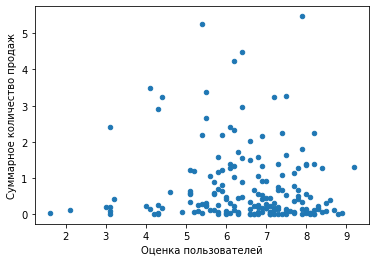

In [36]:
#построение диаграммы рассеяния для оценки пользователей
data_current[data_current['platform']=='XOne'].plot(x='user_score',
                                                    y='sales_sum',
                                                    kind='scatter', 
                                                    xlabel='Оценка пользователей',
                                                    ylabel='Суммарное количество продаж')

In [37]:
#вычисление коэффициента Пирсона
data_current[data_current['platform']=='XOne']['user_score'].corr(data_current[data_current['platform']=='XOne']['sales_sum'])

-0.06892505328279416

По полученной диаграмме можно сказать, что для платформы XOne оценка пользователей не влияет на продажи игр, коэффициент Пирсона -0.07 также это подтверждает.

* `3DS`

<AxesSubplot:xlabel='Оценка критиков', ylabel='Суммарное количество продаж'>

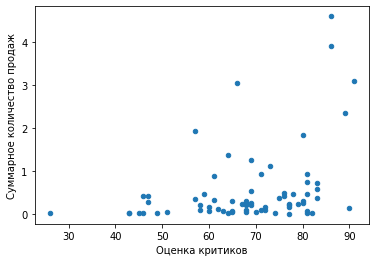

In [38]:
#построение диаграммы рассеяния для оценки критиков
data_current[data_current['platform']=='3DS'].plot(x='critic_score',
                                                   y='sales_sum',
                                                   kind='scatter', 
                                                   xlabel='Оценка критиков',
                                                   ylabel='Суммарное количество продаж')

In [39]:
#вычисление коэффициента Пирсона
data_current[data_current['platform']=='3DS']['critic_score'].corr(data_current[data_current['platform']=='3DS']['sales_sum'])

0.3570566142288103

По полученному графику заметно, что для 3DS с увеличением оценки критиков в некоторых случаях продажи игр растут. Коэффициент Пирсона 0.36 подтверждает, что связь между оценкой критиков и продажами есть, хоть и не сильная.

<AxesSubplot:xlabel='Оценка пользователей', ylabel='Суммарное количество продаж'>

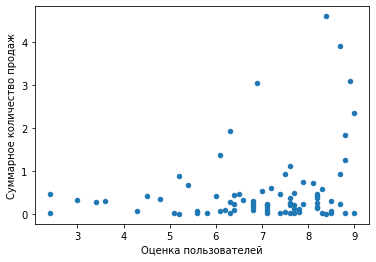

In [40]:
#построение диаграммы рассеяния для оценки пользователей
data_current[data_current['platform']=='3DS'].plot(x='user_score',
                                                   y='sales_sum',
                                                   kind='scatter', 
                                                   xlabel='Оценка пользователей',
                                                   ylabel='Суммарное количество продаж')

In [41]:
#вычисление коэффициента Пирсона
data_current[data_current['platform']=='3DS']['user_score'].corr(data_current[data_current['platform']=='3DS']['sales_sum'])

0.24150411773563016

По полученной диаграмме можно сказать, что для платформы 3DS оценка пользователей иногда влияет на увеличение продаж игр, коэффициент Пирсона 0.24 также это подтверждает.

Рассмотрим общее расределение игр по жанрам. Посмотрим, для каких жанров значение продаж самое большое.

<AxesSubplot:title={'center':'Суммарные продажи игр по жанрам'}, xlabel='genre'>

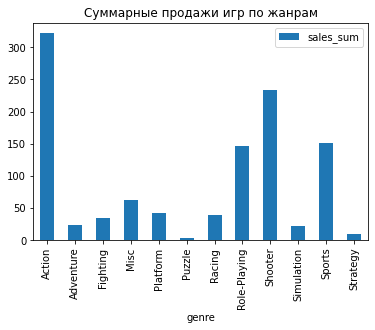

In [42]:
#гистограмма распределения продаж по жанрам
data_current.pivot_table(index='genre', 
                         values='sales_sum',
                         aggfunc='sum').plot(kind='bar', 
                                             title='Суммарные продажи игр по жанрам')

Сравним медианные значения продаж, для этого построим диаграммы размаха для каждого жанра.

<AxesSubplot:xlabel='sales_sum', ylabel='genre'>

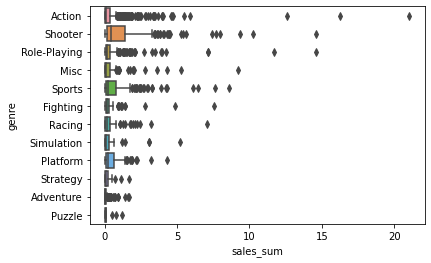

In [43]:
#диаграмма размаха в полном размере
sns.boxplot(x=data_current['sales_sum'], y=data_current['genre'], orient='h')

<AxesSubplot:xlabel='sales_sum', ylabel='genre'>

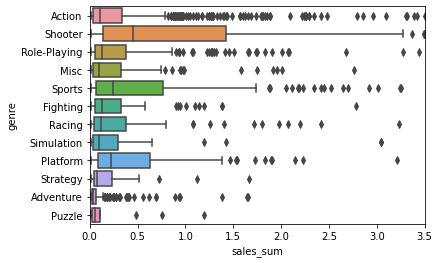

In [44]:
#диаграмма размаха в масштабированном размере
plt.xlim(0, 3.5)
sns.boxplot(x=data_current['sales_sum'], y=data_current['genre'], orient='h')

По полученным диаграммам видно, что самые прибыльные жанры - это Shooter, Sports, Action и Platform, а самые низкие продажи у жанров Adventure, Puzzle и Strategy.

### Вывод

На данном этапе на основании количества выпускаемых игр по годам и суммарным продажам по платформам был выявлен актуальный период для планирования кампании на 2017 год - это отрезок 2013-2016. Также были выделены 3 потенциально прибыльные платформы: PS4, XOne, 3DS, были построены и исследованы диаграммы размаха по продажам для этих платформ, а также было исследовано влияние оценок критиков и пользователей на продажи. Сделан вывод, что для платформ PS4 и XOne на рост продаж влияют оценки критиков, а для платформы 3DS на рост продаж влияют и оценки критиков, и оценки пользователей. Также были выявлены самые продаваемые жанры игр - Shooter, Sports, Action и Platform, самые низкие продажи у жанров Adventure, Puzzle и Strategy.

## Составление портрета пользователя каждого региона 

### Топ-5 самых популярных платформ для пользователя каждого региона 

* Северная Америка

In [45]:
#топ-5 самых популярных платформ в Северной Америке
na_top_platform = data_current.pivot_table(index='platform',
                                           values='na_sales',
                                           aggfunc='sum').sort_values(by='na_sales',
                                                                      ascending=False).reset_index()
na_top_platform.head()

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


* Европа

In [46]:
#топ-5 самых популярных платформ в Европе
eu_top_platform = data_current.pivot_table(index='platform',
                                           values='eu_sales',
                                           aggfunc='sum').sort_values(by='eu_sales',
                                                                      ascending=False).reset_index()
eu_top_platform.head()

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


* Япония

In [47]:
#топ-5 самых популярных платформ в Японии
jp_top_platform = data_current.pivot_table(index='platform',
                                           values='jp_sales',
                                           aggfunc='sum').sort_values(by='jp_sales',
                                                                      ascending=False).reset_index()
jp_top_platform.head()

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


Теперь построим круговые диаграммы для каждого региона.

<AxesSubplot:title={'center':'Топ-5 платформ в Японии'}, ylabel='jp_sales'>

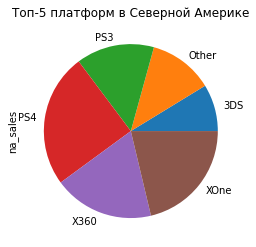

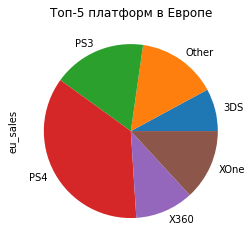

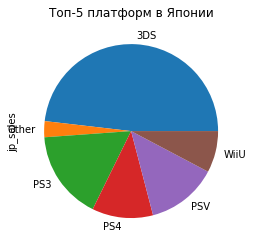

In [48]:
#заменяем значения не из топ-5 на Other
na_top_platform['platform'] = na_top_platform['platform'].where(na_top_platform['platform'].isin(na_top_platform['platform'].head()), 'Other')
eu_top_platform['platform'] = eu_top_platform['platform'].where(eu_top_platform['platform'].isin(eu_top_platform['platform'].head()), 'Other')
jp_top_platform['platform'] = jp_top_platform['platform'].where(jp_top_platform['platform'].isin(jp_top_platform['platform'].head()), 'Other')
#строим круговые диаграммы
na_top_platform.groupby('platform').sum().plot(kind='pie',
                                               y='na_sales',
                                               legend=False, 
                                               title='Топ-5 платформ в Северной Америке')
eu_top_platform.groupby('platform').sum().plot(kind='pie',
                                               y='eu_sales',
                                               legend=False,
                                               title='Топ-5 платформ в Европе')
jp_top_platform.groupby('platform').sum().plot(kind='pie',
                                               y='jp_sales',
                                               legend=False,
                                               title='Топ-5 платформ в Японии')

В Северной Америке и в Европе самой популярной платформой является PS4, в Японии же самой популярной платформой является 3DS, PS4 в Японии занимает только 4 место. Также в Северной Америке и в Европе все 3 потенциально прибыльные платформы, выявленные на предыдущем этапе (PS4, XOne, 3DS), вошли в топ-5, в Японии же XOne не входит в топ-5 самых популярных платформ. Также можно заметить, что суммарные продажи игр для различных платформ в Северной Америке и Европе выше, чем в Японии.

### Топ-5 самых популярных жанров для пользователя каждого региона 

* Северная Америка

In [49]:
#топ-5 самых популярных жанров в Северной Америке
na_top_genre = data_current.pivot_table(index='genre',
                                        values='na_sales',
                                        aggfunc='sum').sort_values(by='na_sales',
                                                                   ascending=False).reset_index()
na_top_genre.head()

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


* Европа

In [50]:
#топ-5 самых популярных жанров в Европе
eu_top_genre = data_current.pivot_table(index='genre',
                                        values='eu_sales',
                                        aggfunc='sum').sort_values(by='eu_sales',
                                                                   ascending=False).reset_index()
eu_top_genre.head()

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


* Япония

In [51]:
#топ-5 самых популярных жанров в Японии
jp_top_genre = data_current.pivot_table(index='genre',
                                        values='jp_sales',
                                        aggfunc='sum').sort_values(by='jp_sales',
                                                                   ascending=False).reset_index()
jp_top_genre.head()

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


Построим круговые диаграммы для каждого региона.

<AxesSubplot:title={'center':'Топ-5 жанров в Японии'}, ylabel='jp_sales'>

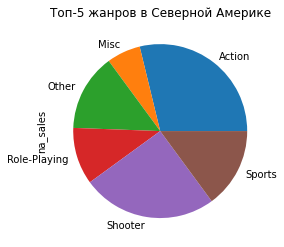

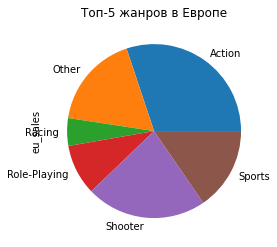

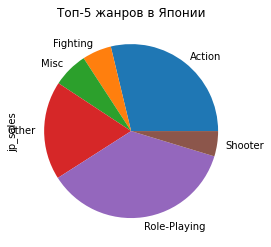

In [52]:
#заменяем значения не из топ-5 на Other
na_top_genre['genre'] = na_top_genre['genre'].where(na_top_genre['genre'].isin(na_top_genre['genre'].head()), 'Other')
eu_top_genre['genre'] = eu_top_genre['genre'].where(eu_top_genre['genre'].isin(eu_top_genre['genre'].head()), 'Other')
jp_top_genre['genre'] = jp_top_genre['genre'].where(jp_top_genre['genre'].isin(jp_top_genre['genre'].head()), 'Other')
#строим круговые диаграммы
na_top_genre.groupby('genre').sum().plot(kind='pie',
                                         y='na_sales',
                                         legend=False, 
                                         title='Топ-5 жанров в Северной Америке')
eu_top_genre.groupby('genre').sum().plot(kind='pie',
                                         y='eu_sales',
                                         legend=False,
                                         title='Топ-5 жанров в Европе')
jp_top_genre.groupby('genre').sum().plot(kind='pie',
                                         y='jp_sales',
                                         legend=False,
                                         title='Топ-5 жанров в Японии')

В Северной Америке и в Европе топ-5 жанров практически одинаков, за исключением последней позиции - в Северной Америке это Misc, в Европе Racing. Самый популярный жанр в Северной Америке и в Европе Action в Японии занимает 2 место, а самый популярный жанр в Японии Role-Playing занимает в Северной Америке и в Европе 4 место в топ-5. В целом, топ-5 для всех регионов состоят примерно из одних и тех же жанров, жанры Action, Role-Playing, Shooter есть во всех 3 рейтингах.	

### Влияние рейтинга ESRB на продажи в отдельном регионе

* Северная Америка

In [53]:
#продажи в Северной Америке в зависимости от рейтинга
na_rating = data_current.pivot_table(index='rating',
                                     values='na_sales',
                                     aggfunc='sum').sort_values(by='na_sales',
                                                                ascending=False)
na_rating

,na_sales
rating,
M,165.21
Unknown,89.42
E,79.05
E10+,54.24
T,49.79


* Европа

In [54]:
#продажи в Европе в зависимости от рейтинга
eu_rating = data_current.pivot_table(index='rating',
                                     values='eu_sales',
                                     aggfunc='sum').sort_values(by='eu_sales',
                                                                ascending=False)
eu_rating

,eu_sales
rating,
M,145.32
E,83.36
Unknown,78.91
E10+,42.69
T,41.95


* Япония

In [55]:
#продажи в Японии в зависимости от рейтинга
jp_rating = data_current.pivot_table(index='rating',
                                     values='jp_sales',
                                     aggfunc='sum').sort_values(by='jp_sales',
                                                                ascending=False)
jp_rating

,jp_sales
rating,
Unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


Построим круговые диаграммы для каждого региона.

<AxesSubplot:title={'center':'Влияние рейтинга ESRB на продажи в Японии'}, ylabel='jp_sales'>

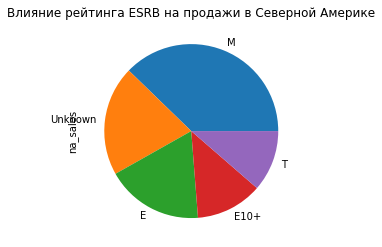

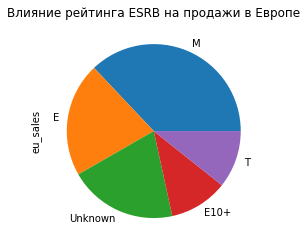

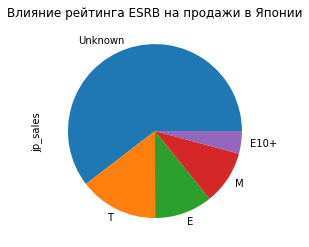

In [56]:
na_rating.plot(kind='pie', 
               y='na_sales', 
               legend=False, 
               title='Влияние рейтинга ESRB на продажи в Северной Америке')
eu_rating.plot(kind='pie', 
               y='eu_sales', 
               legend=False, 
               title='Влияние рейтинга ESRB на продажи в Европе')
jp_rating.plot(kind='pie', 
               y='jp_sales', 
               legend=False, 
               title='Влияние рейтинга ESRB на продажи в Японии')

Рейтинг ESRB одинаково влияет на продажи в Северной Америке и Европе, чаще всего в этих регионах продаются игры с рейтингом M (для взрослых), затем идут игры с рейтингом E (для всех), далее игры с рейтингом E10+ (для всех от 10 лет и старше) и T (подросткам), причем продажи игр с рейтингом E10+ и T примерно одинаковы. Различие только в том, что игры не из США и Канады занимают в Северной Америке 2 место по продажам, а в Европе 3 место. В Японии самые большие продажи у игр без рейтинга ESRB, затем идут игры с рейтингом T (подросткам), за ними следуют игры с рейтингом E (для всех) и М (для взрослых), для рейтингов E и M продажи примерно одинаковы, и далее игры с рейтингом E10+ (для всех от 10 лет и старше).

### Вывод

Для пользователей Северной Америки, Европы и Японии был составлен портрет, для каждого региона был определен топ-5 самых популярных платформ, топ-5 самых популярных жанров, а также было определено влияние рейтинга ESRB на продажи. В целом портреты пользователей из Северной Америки и Европы во многом похожи, портреты пользователей из Японии заметно отличаются.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:
* Нулевая гипотеза: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
* Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Так как данные по платформам Xbox One и PC - это не зависящие друг от друга выборки и сравниваются средние двух генеральных совокупностей, то будем проверять гипотезу о равенстве средних двух генеральных совокупностей с помощью метода `scipy.stats.ttest_ind()`. Уровень статистической значимости alpha зададим равным 0.05.

In [58]:
from scipy import stats as st
alpha = 0.05
res = st.ttest_ind(data_current[(data_current['platform']=='XOne') & ~(data_current['user_score'].isna())]['user_score'],
                   data_current[(data_current['platform']=='PC') & ~(data_current['user_score'].isna())]['user_score'])
print('p-value:', res.pvalue)
#если p-value < alpha, то нулевую гипотезу отвергаем
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, следовательно, средние пользовательские рейтинги платформ Xbox One и PC не различаются. 

Проверим вывод, посчитав средние пользовательские рейтинги по данным платформам.

In [60]:
print('Средний пользовательский рейтинг платформы Xbox One:', 
      data_current[data_current['platform']=='XOne']['user_score'].mean())
print('Средний пользовательский рейтинг платформы Xbox One:', 
      data_current[data_current['platform']=='PC']['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы Xbox One: 6.269677419354839


Значения действительно не сильно различаются, следовательно, вывод верный.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:
* Нулевая гипотеза: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.
* Альтернативная гипотеза: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Так как данные по жанрам Action и Sports - это не зависящие друг от друга выборки и сравниваются средние двух генеральных совокупностей, то будем проверять гипотезу о равенстве средних двух генеральных совокупностей с помощью метода `scipy.stats.ttest_ind()`. Уровень статистической значимости alpha зададим равным 0.05.

In [61]:
alpha = 0.05
res = st.ttest_ind(data_current[(data_current['genre']=='Action') & ~(data_current['user_score'].isna())]['user_score'],
                   data_current[(data_current['genre']=='Sports') & ~(data_current['user_score'].isna())]['user_score'])
print('p-value:', res.pvalue)
#если p-value < alpha, то нулевую гипотезу отвергаем
if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем, следовательно, средние пользовательские рейтинги жанров Action и Sports различаются.


Проверим вывод, посчитав средние пользовательские рейтинги по данным жанрам.

In [62]:
print('Средний пользовательский рейтинг жанра Action:', 
      data_current[data_current['genre']=='Action']['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', 
      data_current[data_current['genre']=='Sports']['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676093
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


Значения сильно различаются, следовательно, вывод верный.

### Вывод

На данном шаге были проверены гипотезы и сделаны следующие выводы:
* средние пользовательские рейтинги платформ Xbox One и PC не различаются;
* средние пользовательские рейтинги жанров Action и Sports не различаются.

## Общий вывод

В ходе данного исследования были изучены данные о продажах и оценках игр. Предоставленные данные были подготовлены, приведены к нужным типам, названия столбцов приведены к нижнему регистру, пропуски обработаны. Были посчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец.

Был проведен исследоательский анализ данных:
* На основании количества выпускаемых игр по годам и суммарным продажам по платформам был выявлен актуальный период для планирования кампании на 2017 год - это отрезок 2013-2016; 
* Выделены 3 потенциально прибыльные платформы: PS4, XOne, 3DS; 
* Построены и исследованы диаграммы размаха по продажам для этих платформ;
* Исследовано влияние оценок критиков и пользователей на продажи. Сделан вывод, что для платформ PS4 и XOne на рост продаж влияют оценки критиков, а для платформы 3DS на рост продаж влияют и оценки критиков, и оценки пользователей;
* Выявлены самые продаваемые жанры игр - Shooter, Sports, Action и Platform, самые низкие продажи у жанров Adventure, Puzzle и Strategy.

Также был составлен портрет пользователя каждого региона:
* Определены топ-5 самых популярных платформ для каждого региона. В Северной Америке и в Европе самой популярной платформой является PS4, в Японии же самой популярной платформой является 3DS, PS4 в Японии занимает только 4 место. Также в Северной Америке и в Европе все 3 потенциально прибыльные платформы (PS4, XOne, 3DS) вошли в топ-5, в Японии же XOne не входит в топ-5 самых популярных платформ. Также можно заметить, что суммарные продажи игр для различных платформ в Северной Америке и Европе выше, чем в Японии.
* Определены топ-5 самых популярных жанров для каждого региона. В Северной Америке и в Европе топ-5 жанров практически одинаков, за исключением последней позиции - в Северной Америке это Misc, в Европе Racing. Самый популярный жанр в Северной Америке и в Европе Action в Японии занимает 2 место, а самый популярный жанр в Японии Role-Playing занимает в Северной Америке и в Европе 4 место. В целом, топ-5 для всех регионов состоят примерно из одних и тех же жанров, жанры Action, Role-Playing, Shooter есть во всех 3 рейтингах.
* Изучено влияние рейтинга ESRB на продажи в отдельном регионе. Рейтинг ESRB одинаково влияет на продажи в Северной Америке и Европе, чаще всего в этих регионах продаются игры с рейтингом M (для взрослых), затем идут игры с рейтингом E (для всех), далее игры с рейтингом E10+ (для всех от 10 лет и старше) и T (подросткам), причем продажи игр с рейтингом E10+ и T примерно одинаковы. Различие только в том, что игры не из США и Канады занимают в Северной Америке 2 место по продажам, а в Европе 3 место. В Японии самые большие продажи у игр без рейтинга ESRB, затем идут игры с рейтингом T (подросткам), за ними следуют игры с рейтингом E (для всех) и М (для взрослых), для рейтингов E и M продажи примерно одинаковы, и далее игры с рейтингом E10+ (для всех от 10 лет и старше).

В целом портреты пользователей из Северной Америки и Европы во многом похожи, портрет пользователей из Японии заметно отличается.

Были проверены следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

После проверки гипотезы о равенстве среднего двух генеральных совокупностей нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось отвергнуть, следовательно, средние пользовательские рейтинги платформ не различаются.

* Средние пользовательские рейтинги жанров Action и Sports разные:

После проверки гипотезы о равенстве среднего двух генеральных совокупностей нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута, следовательно, средние пользовательские рейтинги жанров различаются.

При планировании кампании на 2017 год:
* в Северной Америке и Европе следует обратить внимание на платформу PS4, на игры жанров Action и Shooter, с рейтингом ESRB M и E и игры, выпущенные не в США или Канаде. Следует обращать внимание на оценки критиков;
* В Японии нужно уделить внимание платформе 3DS, играм жанров Role-Playing и Action, произведенные не в США или Канаде, либо с рейтингом T. Обращать внимание стоит и на оценки критиков, и на оценки пользователей.